In [8]:
import numpy as np
%tensorflow_version 2.x
%pylab inline
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Populating the interactive namespace from numpy and matplotlib


In [9]:

# Load the MNIST dataset from Keras
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the training data to be in the range [0, 1]
x_train = x_train / 255.0

# Normalize the test data to be in the range [0, 1]
x_test = x_test / 255.0


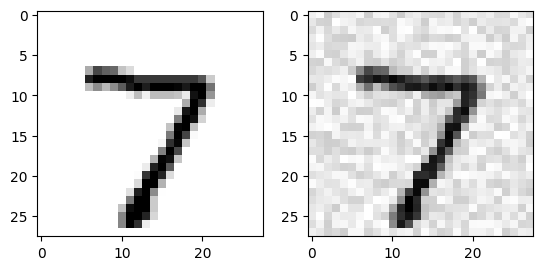

In [10]:
# Set the figure size for the plot
#figsize(5, 10)

# Plot the original image from the test set
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

# Plot the noisy version of the original image
subplot(1, 2, 2)
# Generate random noise and add it to the original image
noise = np.random.random((28, 28)) / 4
imshow(x_test[0] + noise, cmap="binary")


In [11]:
# Define the encoder model using dense (fully connected) layers
encoder = keras.models.Sequential([
    # Flatten the input images (28x28) into a 1D array of 784 elements
    keras.layers.Flatten(input_shape=[28, 28]),
    # Add a dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add another dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add a dense layer with 30 neurons and ReLU activation function to generate the latent space representation
    keras.layers.Dense(30, activation="relu")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Define the decoder model using dense (fully connected) layers
decoder = keras.models.Sequential([
    # Add a dense layer with 100 neurons and ReLU activation function, input shape is 30 (latent space representation)
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    # Add another dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    # Add a dense layer with 784 neurons (28*28) and sigmoid activation function to output pixel values in range [0, 1]
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    # Reshape the output into the original image shape (28x28)
    keras.layers.Reshape([28, 28])
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Combine the encoder and decoder models to create the stacked autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [14]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross-entropy loss function for binary input data (normalized pixel values)
    loss="binary_crossentropy",
    # Use the Adam optimizer for efficient training
    optimizer='adam'
)


In [15]:
# Add random noise to the training and test data
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)


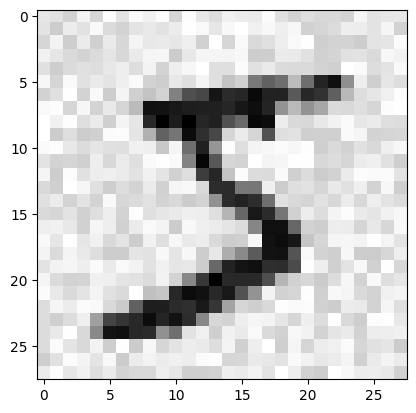

In [16]:
# Display an example of the noisy training data
imshow(x_train_noise[0], cmap="binary")


In [17]:
# Train the stacked autoencoder model on the noisy training data
history = stacked_autoencoder.fit(
    # Input is the noisy training data (x_train_noise), target is the original clean training data (x_train)
    x_train_noise, x_train,
    # Train for 10 epochs
    epochs=10,
    # Use noisy test data (x_test_noise) for validation during training, with original clean test data (x_test) as target
    validation_data=[x_test_noise, x_test]
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.2095 - val_loss: 0.1224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.1201 - val_loss: 0.1097
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.1091 - val_loss: 0.1030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1034 - val_loss: 0.0996
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.1001 - val_loss: 0.0978
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0984 - val_loss: 0.0970
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - loss: 0.0971 - val_loss: 0.0964
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.0961 - val_loss: 0.0945
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0949 - val_loss: 0.0939
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0946 - val_loss: 0.0936


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


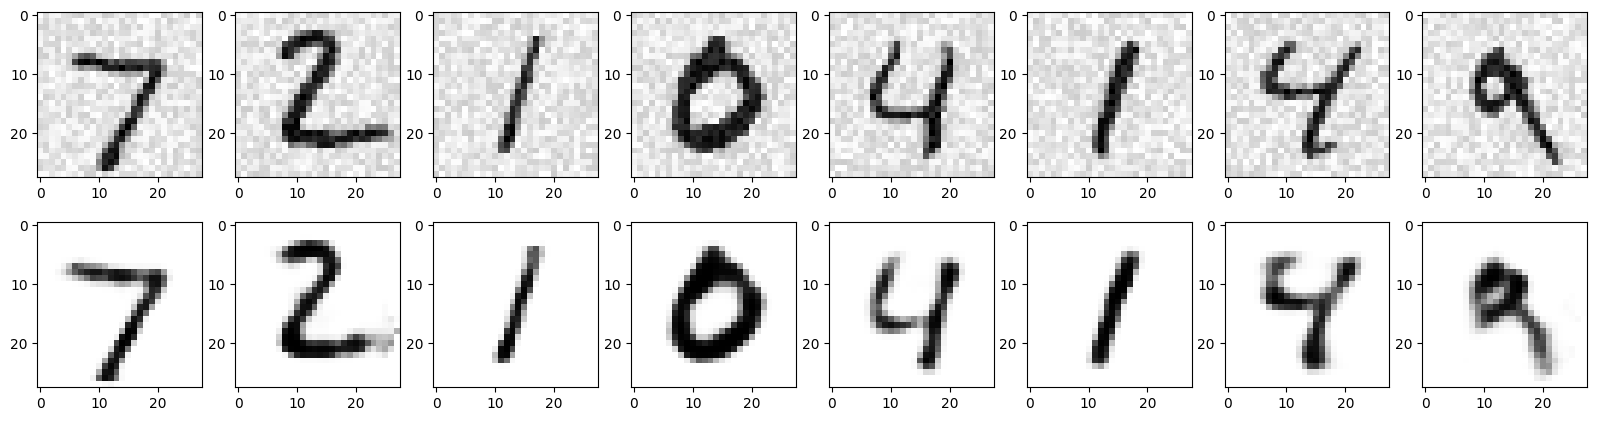

In [18]:
# Set the figure size for the plot
figsize(20, 5)

# Iterate over 8 examples from the noisy test set
for i in range(8):
    # Plot the noisy version of the original image from the test set
    subplot(2, 8, i+1)
    imshow(x_test_noise[i], cmap="binary")

    # Plot the reconstructed image by the stacked autoencoder using the noisy input
    subplot(2, 8, i+8+1)
    # Make a prediction using the stacked autoencoder on the current noisy test image
    pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
    # Display the reconstructed image
    imshow(pred.reshape((28, 28)), cmap="binary")


# MNIST Image Denoising using a Stacked Autoencoder

This repository contains a Jupyter notebook demonstrating a stacked autoencoder for denoising MNIST images. An autoencoder learns efficient data encodings. This stacked autoencoder uses dense layers to reconstruct clean images from noisy inputs.

## Project Overview

The goal is to remove noise from images using a stacked autoencoder. This network learns to reconstruct clean images from noisy versions.

## Dataset

The project uses the MNIST dataset: 28x28 grayscale images of handwritten digits.

## Model Architecture

The stacked autoencoder has an encoder to reduce image dimensionality and a decoder to reconstruct the image. It's trained with noisy images as input and clean images as output.

## Notebook Contents

The notebook covers:

1.  **Loading and Preprocessing Data:** Loading and normalizing MNIST data.
2.  **Adding Noise:** Creating noisy versions of the images.
3.  **Building the Autoencoder:** Defining the model with Keras.
4.  **Training the Autoencoder:** Training the model on noisy data.
5.  **Evaluating Denoising Performance:** Visualizing results.

## How to Run the Notebook

1.  Clone this repository.
2.  Install dependencies (TensorFlow, Keras, NumPy, Matplotlib).
3.  Open `mnist_denoising_autoencoder.ipynb` in a Jupyter environment.
4.  Run the cells.

## Dependencies

-   TensorFlow
-   Keras
-   NumPy
-   Matplotlib

## Results

The autoencoder effectively removes noise, producing clearer images. Visual examples are in the notebook output.

## Future Improvements

-   Experiment with convolutional autoencoders.
-   Explore different noise types/levels.
-   Hyperparameter tuning.
-   Quantitative evaluation (e.g., PSNR).

## License

[Specify your license here, e.g., MIT License]